In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# Import Data

source: http://www.bom.gov.au/climate/data/

In [3]:
df = pd.read_csv("data/daily_min_temp.csv", parse_dates=["Date"], index_col="Date")
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


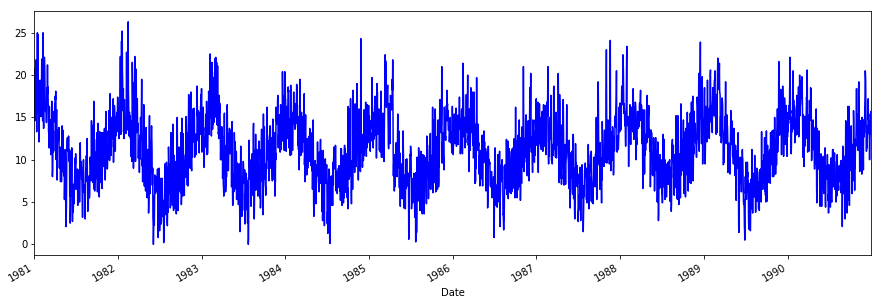

In [4]:
df.Temp.plot(figsize=(15, 5), color='b')

# Dataset Splitting

In [5]:
ts_train, ts_test = train_test_split(df, test_size=0.2, shuffle=False)
ts_train.shape, ts_test.shape

((2920, 1), (730, 1))

# Prepare Sequence

In [6]:
from jcopdl.utils.dataloader import TimeSeriesDataset
from torch.utils.data import DataLoader

In [7]:
seq_len = 14
bs = 32

train_set = TimeSeriesDataset(ts_train, "Temp", seq_len)
trainloader = DataLoader(train_set, batch_size=bs)

test_set = TimeSeriesDataset(ts_test, "Temp", seq_len)
testloader = DataLoader(test_set, batch_size=bs)

(N, S, F): (208, 14, 1)
Note: last 7 data excluded

(N, S, F): (52, 14, 1)
Note: last 1 data excluded



# Arsitektur & Config

In [8]:
from jcopdl.layers import linear_block

In [9]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers, dropout):
        super().__init__()
        
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x, hidden):        
        x, hidden = self.rnn(x, hidden)
        x = self.fc(x)
        return x, hidden

In [10]:
config = set_config({
    "input_size": train_set.n_feature,
    "seq_len": train_set.n_seq,
    "output_size": 1,
    "hidden_size": 64,
    "num_layers": 2,
    "dropout": 0
})

# Training Preparation -> MCOC

In [11]:
model = RNN(config.input_size, config.output_size, config.hidden_size, config.num_layers, config.dropout).to(device)
criterion = nn.MSELoss(reduction='mean')
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir='model/rnn')

# Training


Epoch     1
Train_cost  = 116.5457 | Test_cost  = 100.2431 | 

Epoch     2
Train_cost  = 82.8184 | Test_cost  = 74.7976 | 

Epoch     3
Train_cost  = 63.0297 | Test_cost  = 60.6242 | 

Epoch     4
Train_cost  = 52.1949 | Test_cost  = 52.3324 | 

Epoch     5
Train_cost  = 45.3504 | Test_cost  = 46.2547 | 

Epoch     6
Train_cost  = 40.1300 | Test_cost  = 41.3060 | 

Epoch     7
Train_cost  = 35.8340 | Test_cost  = 37.1281 | 

Epoch     8
Train_cost  = 32.2234 | Test_cost  = 33.5830 | 

Epoch     9
Train_cost  = 29.1888 | Test_cost  = 30.5849 | 

Epoch    10
Train_cost  = 26.6525 | Test_cost  = 28.0633 | 

Epoch    11
Train_cost  = 24.5477 | Test_cost  = 25.9556 | 

Epoch    12
Train_cost  = 22.8151 | Test_cost  = 24.2055 | 

Epoch    13
Train_cost  = 21.4010 | Test_cost  = 22.7621 | 

Epoch    14
Train_cost  = 20.2571 | Test_cost  = 21.5800 | 

Epoch    15
Train_cost  = 19.3406 | Test_cost  = 20.6182 | 

Epoch    16
Train_cost  = 18.6131 | Test_cost  = 19.8409 | 

Epoch    17
Train_cos

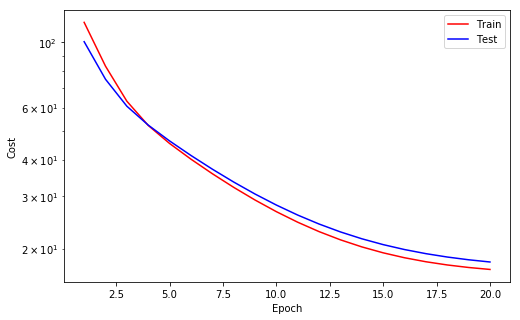


Epoch    21
Train_cost  = 16.7932 | Test_cost  = 17.7609 | 

Epoch    22
Train_cost  = 16.6445 | Test_cost  = 17.5664 | 

Epoch    23
Train_cost  = 16.5337 | Test_cost  = 17.4137 | 

Epoch    24
Train_cost  = 16.4517 | Test_cost  = 17.2937 | 

Epoch    25
Train_cost  = 16.3912 | Test_cost  = 17.1994 | 

Epoch    26
Train_cost  = 16.3465 | Test_cost  = 17.1251 | 

Epoch    27
Train_cost  = 16.3135 | Test_cost  = 17.0663 | 

Epoch    28
Train_cost  = 16.2888 | Test_cost  = 17.0195 | 

Epoch    29
Train_cost  = 16.2699 | Test_cost  = 16.9819 | 

Epoch    30
Train_cost  = 16.2547 | Test_cost  = 16.9509 | 

Epoch    31
Train_cost  = 16.2416 | Test_cost  = 16.9243 | 

Epoch    32
Train_cost  = 16.2289 | Test_cost  = 16.9009 | 

Epoch    33
Train_cost  = 16.2166 | Test_cost  = 16.8813 | 

Epoch    34
Train_cost  = 16.2051 | Test_cost  = 16.8635 | 

Epoch    35
Train_cost  = 16.1925 | Test_cost  = 16.8450 | 

Epoch    36
Train_cost  = 16.1766 | Test_cost  = 16.8236 | 

Epoch    37
Train_cost 

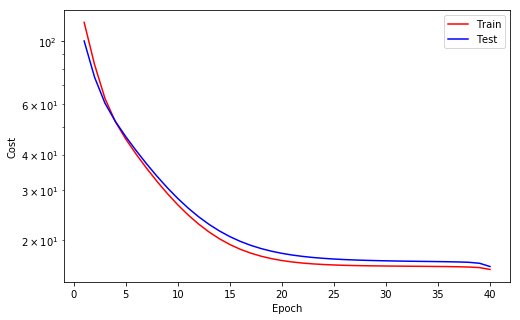


Epoch    41
Train_cost  = 15.1669 | Test_cost  = 15.4048 | 

Epoch    42
Train_cost  = 14.1063 | Test_cost  = 14.4419 | 

Epoch    43
Train_cost  = 13.3880 | Test_cost  = 13.7713 | 

Epoch    44
Train_cost  = 12.7362 | Test_cost  = 12.9597 | 

Epoch    45
Train_cost  = 12.0738 | Test_cost  = 12.1601 | 

Epoch    46
Train_cost  = 11.4407 | Test_cost  = 11.4784 | 

Epoch    47
Train_cost  = 10.9437 | Test_cost  = 10.9043 | 

Epoch    48
Train_cost  = 10.5267 | Test_cost  = 10.3895 | 

Epoch    49
Train_cost  = 10.1262 | Test_cost  = 9.9405 | 

Epoch    50
Train_cost  = 9.7671 | Test_cost  = 9.5536 | 

Epoch    51
Train_cost  = 9.4758 | Test_cost  = 9.2061 | 

Epoch    52
Train_cost  = 9.2225 | Test_cost  = 8.8977 | 

Epoch    53
Train_cost  = 8.9986 | Test_cost  = 8.6297 | 

Epoch    54
Train_cost  = 8.8067 | Test_cost  = 8.3940 | 

Epoch    55
Train_cost  = 8.6358 | Test_cost  = 8.1820 | 

Epoch    56
Train_cost  = 8.4781 | Test_cost  = 7.9917 | 

Epoch    57
Train_cost  = 8.3344 | Tes

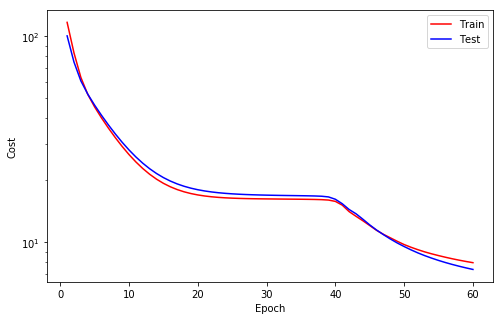


Epoch    61
Train_cost  = 7.8797 | Test_cost  = 7.2812 | 

Epoch    62
Train_cost  = 7.7892 | Test_cost  = 7.1733 | 

Epoch    63
Train_cost  = 7.7067 | Test_cost  = 7.0739 | 

Epoch    64
Train_cost  = 7.6311 | Test_cost  = 6.9818 | 

Epoch    65
Train_cost  = 7.5614 | Test_cost  = 6.8962 | 

Epoch    66
Train_cost  = 7.4969 | Test_cost  = 6.8164 | 

Epoch    67
Train_cost  = 7.4369 | Test_cost  = 6.7418 | 

Epoch    68
Train_cost  = 7.3811 | Test_cost  = 6.6721 | 

Epoch    69
Train_cost  = 7.3289 | Test_cost  = 6.6066 | 

Epoch    70
Train_cost  = 7.2799 | Test_cost  = 6.5451 | 

Epoch    71
Train_cost  = 7.2339 | Test_cost  = 6.4871 | 

Epoch    72
Train_cost  = 7.1905 | Test_cost  = 6.4324 | 

Epoch    73
Train_cost  = 7.1495 | Test_cost  = 6.3808 | 

Epoch    74
Train_cost  = 7.1106 | Test_cost  = 6.3319 | 

Epoch    75
Train_cost  = 7.0736 | Test_cost  = 6.2857 | 

Epoch    76
Train_cost  = 7.0386 | Test_cost  = 6.2419 | 

Epoch    77
Train_cost  = 7.0053 | Test_cost  = 6.2003 

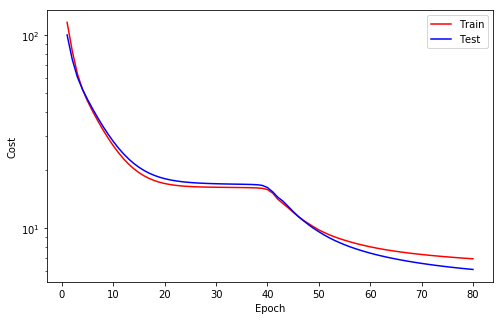


Epoch    81
Train_cost  = 6.8873 | Test_cost  = 6.0546 | 

Epoch    82
Train_cost  = 6.8612 | Test_cost  = 6.0226 | 

Epoch    83
Train_cost  = 6.8364 | Test_cost  = 5.9922 | 

Epoch    84
Train_cost  = 6.8126 | Test_cost  = 5.9633 | 

Epoch    85
Train_cost  = 6.7900 | Test_cost  = 5.9358 | 

Epoch    86
Train_cost  = 6.7683 | Test_cost  = 5.9096 | 

Epoch    87
Train_cost  = 6.7476 | Test_cost  = 5.8846 | 

Epoch    88
Train_cost  = 6.7278 | Test_cost  = 5.8606 | 

Epoch    89
Train_cost  = 6.7088 | Test_cost  = 5.8378 | 

Epoch    90
Train_cost  = 6.6907 | Test_cost  = 5.8159 | 

Epoch    91
Train_cost  = 6.6732 | Test_cost  = 5.7949 | 

Epoch    92
Train_cost  = 6.6565 | Test_cost  = 5.7747 | 

Epoch    93
Train_cost  = 6.6404 | Test_cost  = 5.7553 | 

Epoch    94
Train_cost  = 6.6250 | Test_cost  = 5.7367 | 

Epoch    95
Train_cost  = 6.6101 | Test_cost  = 5.7188 | 

Epoch    96
Train_cost  = 6.5958 | Test_cost  = 5.7015 | 

Epoch    97
Train_cost  = 6.5820 | Test_cost  = 5.6848 

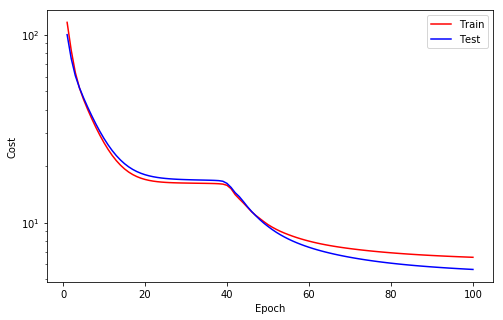


Epoch   101
Train_cost  = 6.5316 | Test_cost  = 5.6237 | 

Epoch   102
Train_cost  = 6.5200 | Test_cost  = 5.6096 | 

Epoch   103
Train_cost  = 6.5088 | Test_cost  = 5.5960 | 

Epoch   104
Train_cost  = 6.4980 | Test_cost  = 5.5828 | 

Epoch   105
Train_cost  = 6.4875 | Test_cost  = 5.5700 | 

Epoch   106
Train_cost  = 6.4773 | Test_cost  = 5.5576 | 

Epoch   107
Train_cost  = 6.4674 | Test_cost  = 5.5456 | 

Epoch   108
Train_cost  = 6.4578 | Test_cost  = 5.5340 | 

Epoch   109
Train_cost  = 6.4485 | Test_cost  = 5.5227 | 

Epoch   110
Train_cost  = 6.4395 | Test_cost  = 5.5117 | 

Epoch   111
Train_cost  = 6.4307 | Test_cost  = 5.5011 | 

Epoch   112
Train_cost  = 6.4221 | Test_cost  = 5.4909 | 

Epoch   113
Train_cost  = 6.4137 | Test_cost  = 5.4809 | 

Epoch   114
Train_cost  = 6.4056 | Test_cost  = 5.4712 | 

Epoch   115
Train_cost  = 6.3977 | Test_cost  = 5.4619 | 

Epoch   116
Train_cost  = 6.3899 | Test_cost  = 5.4528 | 

Epoch   117
Train_cost  = 6.3824 | Test_cost  = 5.4440 

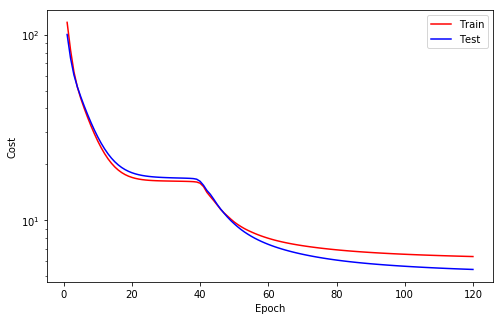


Epoch   121
Train_cost  = 6.3540 | Test_cost  = 5.4116 | 

Epoch   122
Train_cost  = 6.3473 | Test_cost  = 5.4041 | 

Epoch   123
Train_cost  = 6.3407 | Test_cost  = 5.3969 | 

Epoch   124
Train_cost  = 6.3343 | Test_cost  = 5.3899 | 

Epoch   125
Train_cost  = 6.3280 | Test_cost  = 5.3832 | 

Epoch   126
Train_cost  = 6.3219 | Test_cost  = 5.3766 | 

Epoch   127
Train_cost  = 6.3159 | Test_cost  = 5.3703 | 

Epoch   128
Train_cost  = 6.3100 | Test_cost  = 5.3642 | 

Epoch   129
Train_cost  = 6.3042 | Test_cost  = 5.3583 | 

Epoch   130
Train_cost  = 6.2985 | Test_cost  = 5.3526 | 

Epoch   131
Train_cost  = 6.2930 | Test_cost  = 5.3471 | 

Epoch   132
Train_cost  = 6.2875 | Test_cost  = 5.3417 | 

Epoch   133
Train_cost  = 6.2822 | Test_cost  = 5.3366 | 

Epoch   134
Train_cost  = 6.2769 | Test_cost  = 5.3316 | 

Epoch   135
Train_cost  = 6.2717 | Test_cost  = 5.3268 | 

Epoch   136
Train_cost  = 6.2666 | Test_cost  = 5.3222 | 

Epoch   137
Train_cost  = 6.2616 | Test_cost  = 5.3177 

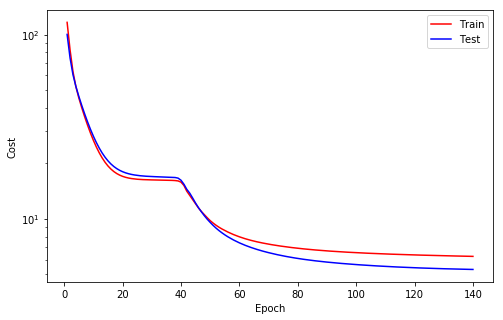


Epoch   141
Train_cost  = 6.2424 | Test_cost  = 5.3015 | 

Epoch   142
Train_cost  = 6.2378 | Test_cost  = 5.2978 | 

Epoch   143
Train_cost  = 6.2332 | Test_cost  = 5.2942 | 

Epoch   144
Train_cost  = 6.2287 | Test_cost  = 5.2908 | 

Epoch   145
Train_cost  = 6.2242 | Test_cost  = 5.2875 | 

Epoch   146
Train_cost  = 6.2199 | Test_cost  = 5.2844 | 

Epoch   147
Train_cost  = 6.2155 | Test_cost  = 5.2814 | 

Epoch   148
Train_cost  = 6.2112 | Test_cost  = 5.2785 | 

Epoch   149
Train_cost  = 6.2070 | Test_cost  = 5.2757 | 

Epoch   150
Train_cost  = 6.2028 | Test_cost  = 5.2731 | 

Epoch   151
Train_cost  = 6.1987 | Test_cost  = 5.2705 | 

Epoch   152
Train_cost  = 6.1946 | Test_cost  = 5.2681 | 

Epoch   153
Train_cost  = 6.1905 | Test_cost  = 5.2658 | 

Epoch   154
Train_cost  = 6.1865 | Test_cost  = 5.2635 | 

Epoch   155
Train_cost  = 6.1825 | Test_cost  = 5.2614 | 

Epoch   156
Train_cost  = 6.1786 | Test_cost  = 5.2594 | 

Epoch   157
Train_cost  = 6.1747 | Test_cost  = 5.2574 

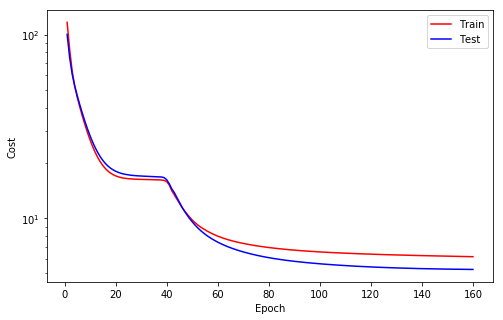


Epoch   161
Train_cost  = 6.1593 | Test_cost  = 5.2504 | 

Epoch   162
Train_cost  = 6.1556 | Test_cost  = 5.2488 | 

Epoch   163
Train_cost  = 6.1518 | Test_cost  = 5.2473 | 

Epoch   164
Train_cost  = 6.1481 | Test_cost  = 5.2458 | 

Epoch   165
Train_cost  = 6.1444 | Test_cost  = 5.2444 | 

Epoch   166
Train_cost  = 6.1408 | Test_cost  = 5.2430 | 

Epoch   167
Train_cost  = 6.1371 | Test_cost  = 5.2417 | 

Epoch   168
Train_cost  = 6.1335 | Test_cost  = 5.2404 | 

Epoch   169
Train_cost  = 6.1299 | Test_cost  = 5.2391 | 

Epoch   170
Train_cost  = 6.1263 | Test_cost  = 5.2379 | 

Epoch   171
Train_cost  = 6.1228 | Test_cost  = 5.2367 | 

Epoch   172
Train_cost  = 6.1192 | Test_cost  = 5.2355 | 

Epoch   173
Train_cost  = 6.1157 | Test_cost  = 5.2343 | 

Epoch   174
Train_cost  = 6.1121 | Test_cost  = 5.2331 | 

Epoch   175
Train_cost  = 6.1086 | Test_cost  = 5.2320 | 

Epoch   176
Train_cost  = 6.1051 | Test_cost  = 5.2309 | 

Epoch   177
Train_cost  = 6.1016 | Test_cost  = 5.2298 

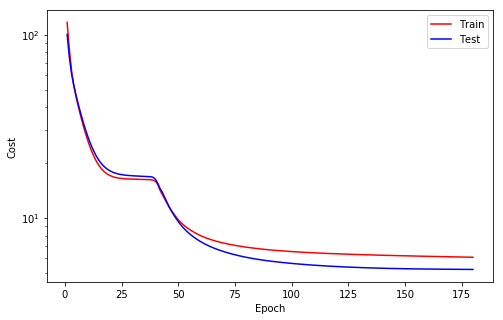


Epoch   181
Train_cost  = 6.0878 | Test_cost  = 5.2257 | 

Epoch   182
Train_cost  = 6.0843 | Test_cost  = 5.2247 | 

Epoch   183
Train_cost  = 6.0809 | Test_cost  = 5.2238 | 

Epoch   184
Train_cost  = 6.0774 | Test_cost  = 5.2229 | 

Epoch   185
Train_cost  = 6.0740 | Test_cost  = 5.2221 | 

Epoch   186
Train_cost  = 6.0705 | Test_cost  = 5.2213 | 

Epoch   187
Train_cost  = 6.0670 | Test_cost  = 5.2205 | 

Epoch   188
Train_cost  = 6.0636 | Test_cost  = 5.2198 | 

Epoch   189
Train_cost  = 6.0601 | Test_cost  = 5.2192 | 

Epoch   190
Train_cost  = 6.0566 | Test_cost  = 5.2186 | 

Epoch   191
Train_cost  = 6.0531 | Test_cost  = 5.2180 | 

Epoch   192
Train_cost  = 6.0496 | Test_cost  = 5.2176 | 

Epoch   193
Train_cost  = 6.0460 | Test_cost  = 5.2172 | 

Epoch   194
Train_cost  = 6.0425 | Test_cost  = 5.2168 | 

Epoch   195
Train_cost  = 6.0389 | Test_cost  = 5.2165 | 

Epoch   196
Train_cost  = 6.0353 | Test_cost  = 5.2163 | 

Epoch   197
Train_cost  = 6.0316 | Test_cost  = 5.2161 

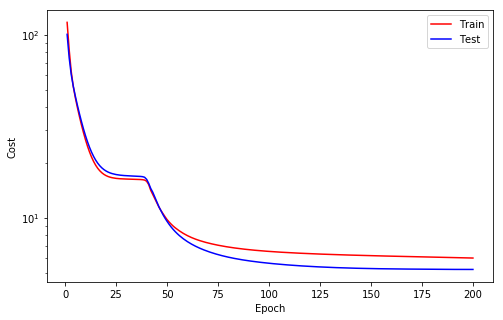

==> EarlyStop patience =  1 | Best test_cost: 5.2160

Epoch   201
Train_cost  = 6.0167 | Test_cost  = 5.2161 | 
==> EarlyStop patience =  2 | Best test_cost: 5.2160

Epoch   202
Train_cost  = 6.0129 | Test_cost  = 5.2163 | 
==> EarlyStop patience =  3 | Best test_cost: 5.2160

Epoch   203
Train_cost  = 6.0090 | Test_cost  = 5.2164 | 
==> EarlyStop patience =  4 | Best test_cost: 5.2160

Epoch   204
Train_cost  = 6.0051 | Test_cost  = 5.2167 | 
==> EarlyStop patience =  5 | Best test_cost: 5.2160
==> Execute Early Stopping at epoch: 204 | Best test_cost: 5.2160
==> Best model is saved at model/rnn


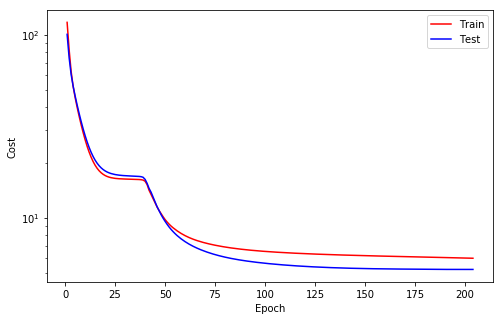

In [12]:
while True:    
    ## Training ##
    model.train()
    cost = 0
    for inputs, targets in trainloader:
        inputs, targets = inputs.to(device), targets.to(device)

        output, hidden = model(inputs, None)
        loss = criterion(output, targets)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        hidden.detach_()

        cost += loss.item() * inputs.shape[0]
    train_cost = cost / len(train_set)
    
    ## Testing ##
    with torch.no_grad():
        model.eval()
        cost = 0
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)

            output, hidden = model(inputs, None)
            loss = criterion(output, targets)

            cost += loss.item() * inputs.shape[0]
        test_cost = cost / len(test_set)

    ## Callback ##
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()        
        break

# Load Best Model

In [13]:
weights = torch.load("model/rnn/weights_best.pth", map_location="cpu")
model.load_state_dict(weights)

<All keys matched successfully>

# Forecast

In [14]:
from luwiji.rnn import illustration

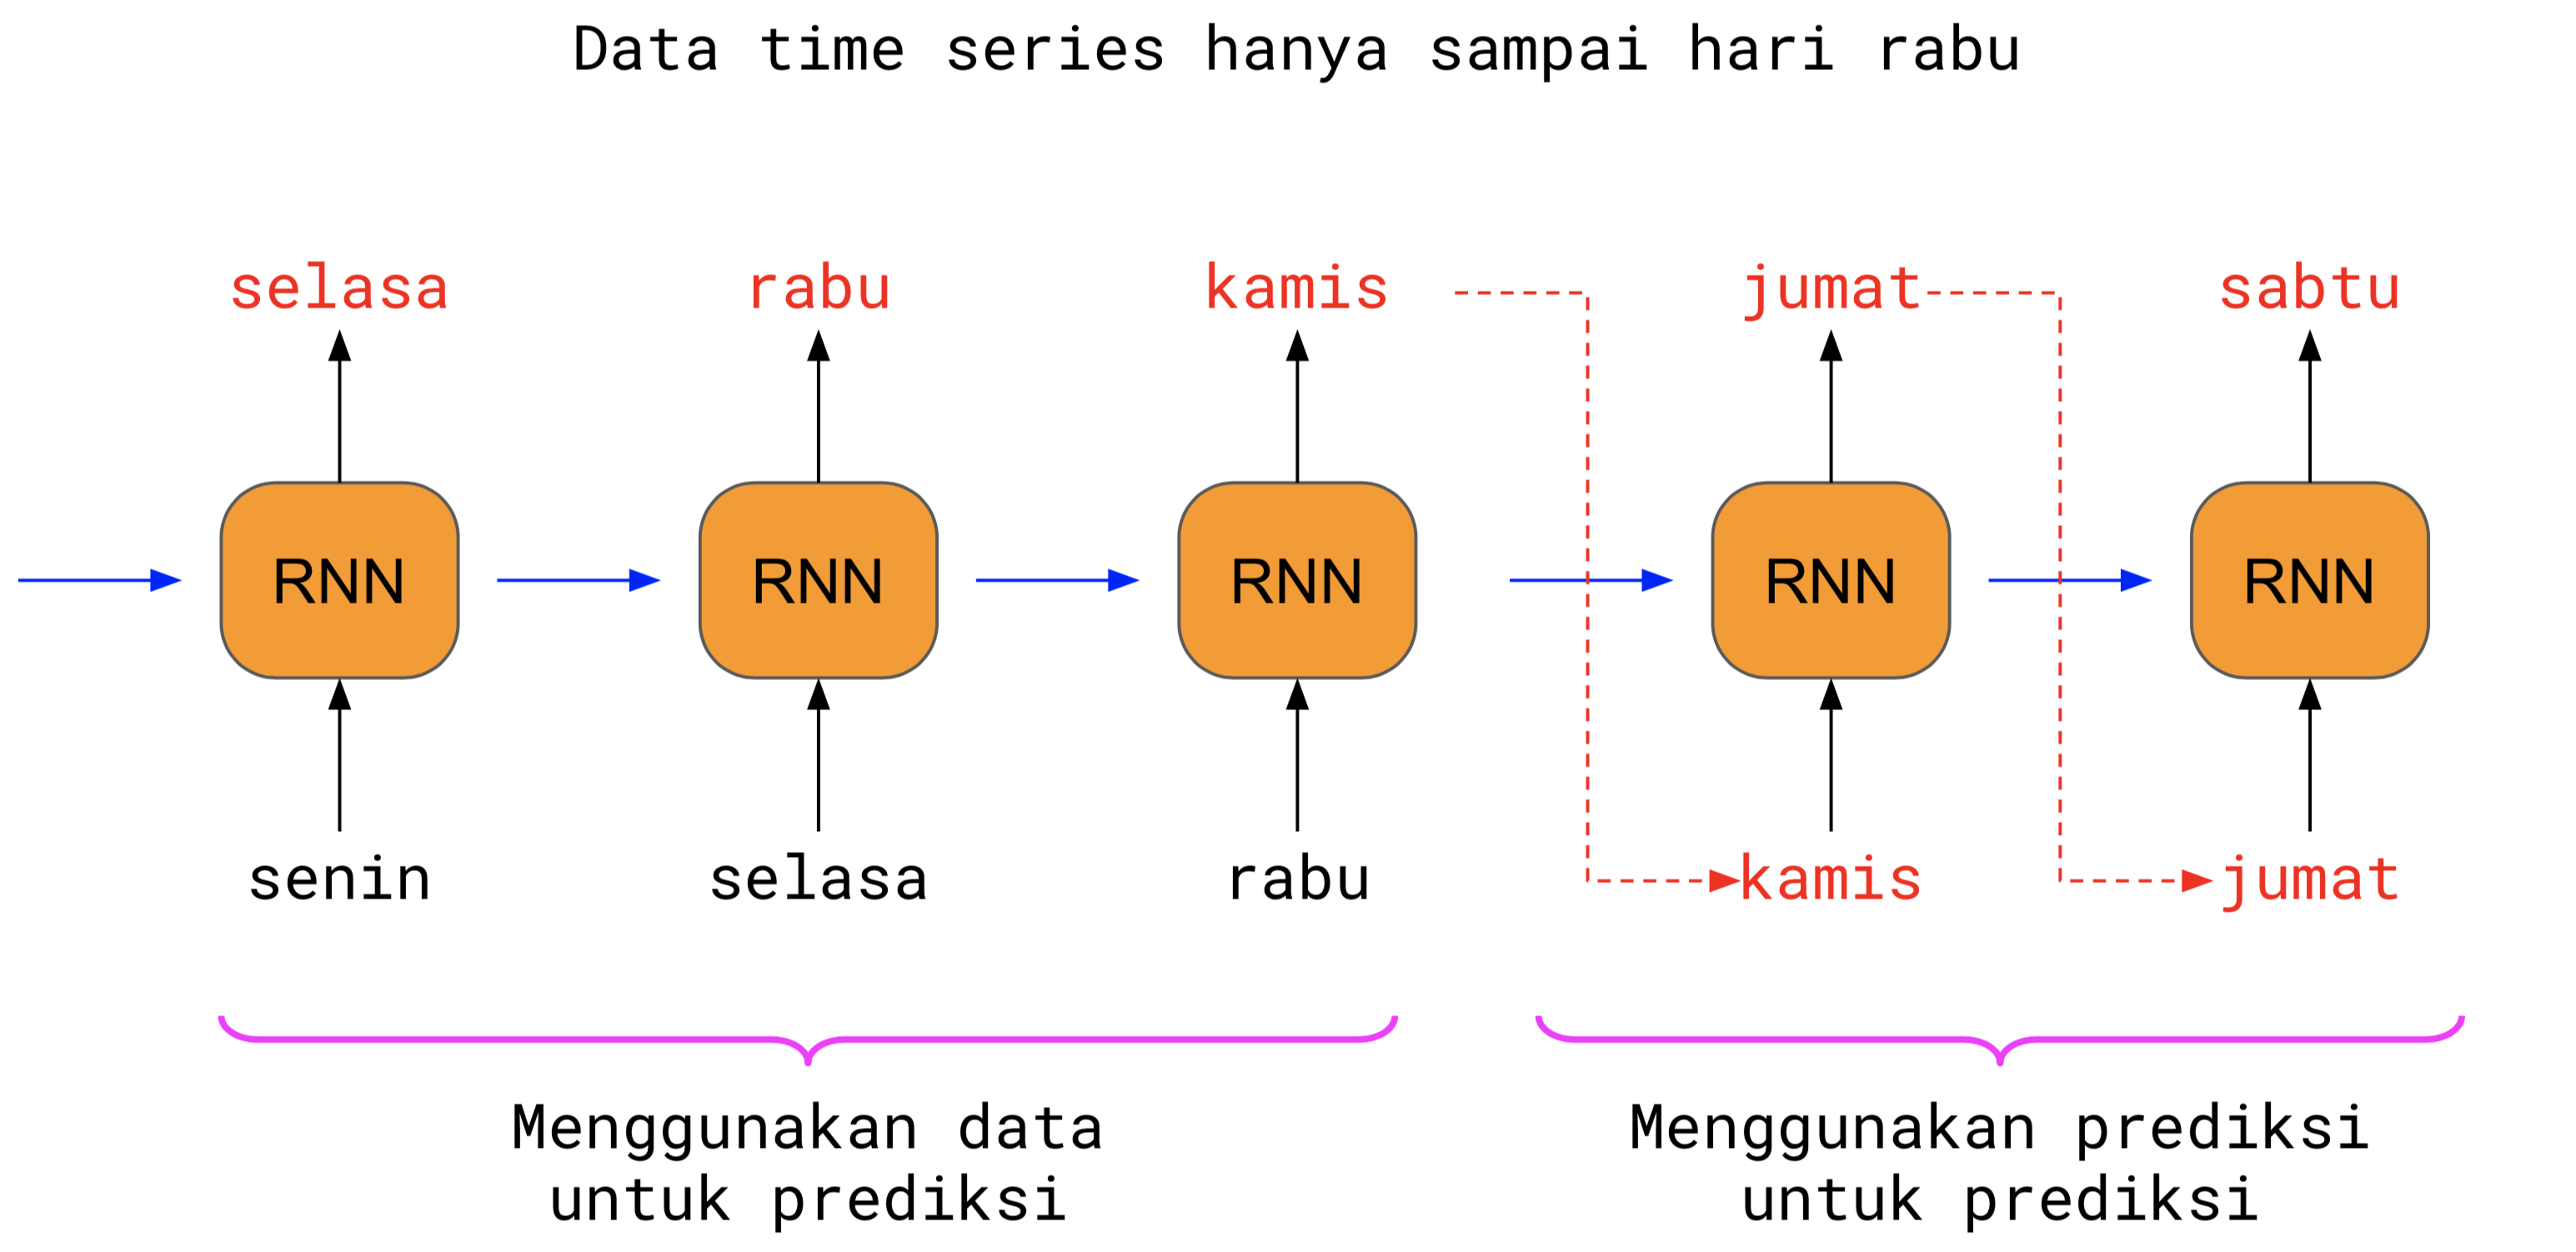

In [15]:
illustration.forecast

In [16]:
from utils import data4pred, pred4pred

In [17]:
train_forecast_set = TimeSeriesDataset(ts_train, "Temp", 1)
trainforecastloader = DataLoader(train_forecast_set)

test_forecast_set = TimeSeriesDataset(ts_test, "Temp", 1)
testforecastloader = DataLoader(test_forecast_set)

(N, S, F): (2919, 1, 1)
Note: last 0 data excluded

(N, S, F): (729, 1, 1)
Note: last 0 data excluded



Text(0.5, 1.0, 'Test')

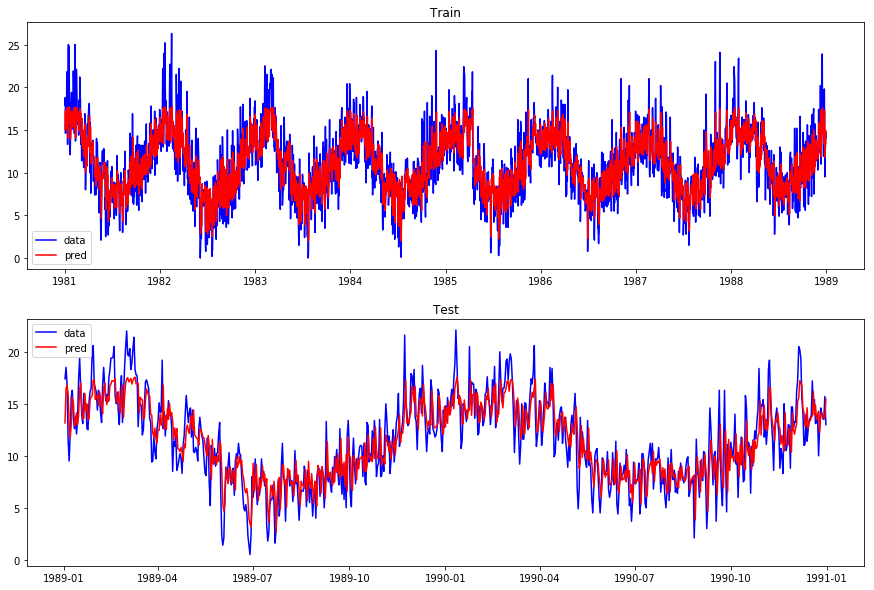

In [18]:
plt.figure(figsize=(15, 10))
    
plt.subplot(211)
data4pred(model, train_forecast_set, trainforecastloader, device)
plt.title("Train")

plt.subplot(212)
data4pred(model, test_forecast_set, testforecastloader, device)
plt.title("Test")

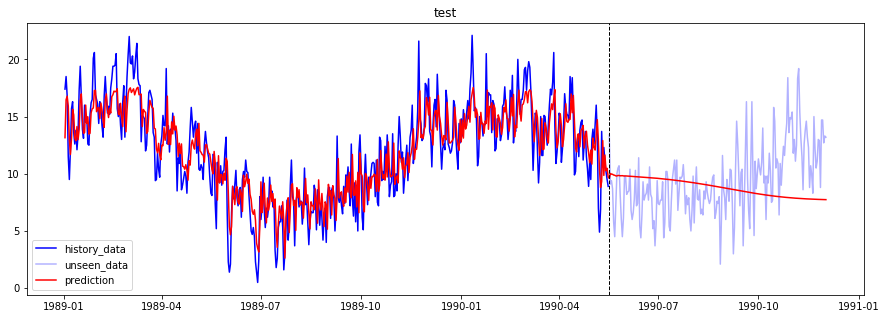

In [19]:
plt.figure(figsize=(15, 5))
pred4pred(model, test_forecast_set, testforecastloader, device)
plt.title("test");